# 201822037 통계학과 한민주 #

## 데이터 선택 동기

2008년부터 많은 사람들의 분노를 사고 있는 아동성범죄자 조두순이 작년(2020년) 12월에 출소했다. 어린 아이를 상대로 끔찍한 범죄를 저질렀으며 그 이전에도 폭행,강간,살인의 전과가 있었음에도 징역 12년이라는 너무 약한 처벌을 받았다. 뉴스는 조두순이 400시간의 심리 치료를 받았음에도 재범 가능성이 높다는 내용을 보도했고 이에 따라 사회적으로 불안감이 증폭되었다. 이외에도 16개월 아이를 학대하여 죽인 입양모 장하영과 입양부 안성은, N번방 조주빈 등 극악무도한 범죄자들이 약소한 형을 받은 채 교도소 밥을 먹으며 살아가고 있다. 이러한 실태에 사형제도에 긍정적인 입장을 가지게 되었고, 아직 몇몇 주에서 사형이 집행되고 있는 미국의 과거 사형수 데이터를 분석해 볼 필요가 있다고 생각했다. 

## dataset : execution data

execution 데이터는 미국의 대법원이 사형을 부활시킨 1976 ~ 2016년 동안 미국에서 집행된 사형과 사형수에 대한 정보를 담고 있다. 1442개의 관측치와 17개의 변수가 존재한다.  


## 변수 설명

- `Date` : 사형집행 날짜
- `Name` : 사형수 이름
- `Crime` : 사형수가 저지른 범죄
- `Method` : 사형 방법
- `Sex` : 사형수 성별
- `Age` : 사형수 나이
- `Race` : 사형수 인종
- `Victim Count` : 희생자 수
- `Victim Sex` : 희생자 성별
- `Victim Race` : 희생자 인종
- `State` : 사형수 출신 주
- `Region` : 사형수 출신 지역
- `Juvenile` : 사형수가 범행 당시 18세 미만이었는지 여부
- `Federal` : 연방범죄인지 여부
- `Volunteer` : 집행 당시 통상적인 항소를 계속해서 포기한 자
- `Foreign National`: 사형수의 외국인 국적 여부

## data load

In [1]:
#패키지 실행
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
import numpy as np
import scipy.stats as stats

In [2]:
#데이터 불러오기
execution= pd.read_csv('./data/execution.csv')

In [3]:
execution.head(6) #데이터 확인

,Date,Name,Age,Sex,Race,Crime,Victim Count,Victim Sex,Victim Race,County,State,Region,Method,Juvenile,Volunteer,Federal,Foreign National
0,01/17/1977,Gary Gilmore,36,Male,White,Murder,1,Male,White,Utah,UT,West,Firing Squad,No,Yes,No,No
1,05/25/1979,John Spenkelink,30,Male,White,Murder,1,Male,White,Leon,FL,South,Electrocution,No,No,No,No
2,10/22/1979,Jesse Bishop,46,Male,White,Murder,1,Male,White,Clark,NV,West,Gas Chamber,No,Yes,No,No
3,03/09/1981,Steven Judy,24,Male,White,Murder,4,"2 Male, 2 Female",White,Marion,IN,Midwest,Electrocution,No,Yes,No,No
4,08/10/1982,Frank Coppola,38,Male,White,Murder,1,Male,White,Newport News City,VA,South,Electrocution,No,Yes,No,No
5,12/07/1982,Charlie Brooks,40,Male,Black,Murder,1,Male,White,Tarrant,TX,South,Lethal Injection,No,No,No,No


In [4]:
execution.columns #변수 이름 확인

Index(['Date', 'Name', 'Age', 'Sex', 'Race', 'Crime', 'Victim Count',
       'Victim Sex', 'Victim Race', 'County', 'State', 'Region', 'Method',
       'Juvenile', 'Volunteer', 'Federal', 'Foreign National'],
      dtype='object')

In [5]:
execution.info() #변수별 데이터 타입 확인 : 수치형 변수 2개, 범주형 변수 15개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1442 non-null   object
 1   Name              1442 non-null   object
 2   Age               1442 non-null   int64 
 3   Sex               1442 non-null   object
 4   Race              1442 non-null   object
 5   Crime             1442 non-null   object
 6   Victim Count      1442 non-null   int64 
 7   Victim Sex        1437 non-null   object
 8   Victim Race       1436 non-null   object
 9   County            1440 non-null   object
 10  State             1442 non-null   object
 11  Region            1442 non-null   object
 12  Method            1442 non-null   object
 13  Juvenile          1442 non-null   object
 14  Volunteer         1442 non-null   object
 15  Federal           1442 non-null   object
 16  Foreign National  1442 non-null   object
dtypes: int64(2), o

## 데이터 분석 및 시각화

### Q1. 
어떤 이유로 사형이 집행되는가?
### A1.
모든 사형수들의 죄목이 살인인 것으로 보아 살인을 저지른 범죄자들에게만 사형이 집행된다.

In [6]:
execution['Crime'].unique()

array(['Murder'], dtype=object)

### Q2. 
사형수들에게 살해당한 희생자의 수는 몇 명인가?

### A2.
미국에서 사형제도가 부활한 해인 1976년부터 2016년까지 41년간 1442명에 대해 사형이 집행되었고, 이 사형수들에게 살해당한 희생자의 수는 2217명이다.  
한 명의 사형수가 살인한 희생자의 수의 평균은 1.5명이지만, 어떤 사형수 한 명이 각 사형수 당 희생자 수의 평균을 높여주고 있는 것이 그래프를 통해 확인되었다.

In [7]:
sum(execution['Victim Count']) #희생자의 수

2217

In [8]:
len(execution['Name']) #사형수의 수

1442

In [9]:
np.mean(execution['Victim Count']) # 한 명의 사형수가 살인한 희생자의 수

1.5374479889042996

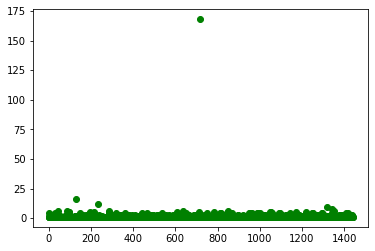

In [10]:
plt.plot(execution['Victim Count'],'ro',color="green") # 희생자의 수에 대한 극단값이 있다.

### Q3.
가장 많은 살인을 저지른 사형수는 누구인가?
### A3.
168명의 희생자를 낸 Timothy McVeigh 이다. 그는 33살 백인의 남성이며, 오클라호마시티 폭탄테러를 일으킨 범죄자이자 테러범이다. 멕베이는 미국 연방정부에 대한 증오로 1995년 연방정부청사 앞에서 폭발물을 가득 실은 트럭을 폭발시켰다. 이로 인해 168명이 사망하고 680명 이상이 부상을 입었으며 6억 5200만 달러의 경제적 손실이 발생되었다.  이 사건은 2001.9.11 테러 전 미국의 가장 심한 폭탄 테러였다. 멕베이는 11개의 연방 범죄의 유죄 선고를 받았으며, 2001년 6월 11일에 사형이 집행되었다.

In [11]:
execution['Victim Count'].sort_values().tail(6) # 168명을 살해한 사형수가 있다.

851       6
1342      8
1319      9
236      12
130      16
716     168
Name: Victim Count, dtype: int64

In [12]:
execution[execution['Victim Count']==max(execution['Victim Count'])] #가장 많은 살인을 저지른 사형수의 정보

,Date,Name,Age,Sex,Race,Crime,Victim Count,Victim Sex,Victim Race,County,State,Region,Method,Juvenile,Volunteer,Federal,Foreign National
716,06/11/2001,Timothy McVeigh*,33,Male,White,Murder,168,NaN,NaN,Oklahoma,FE,South,Lethal Injection,No,Yes,Yes,No


### Q4.
사형수/희생자의 인종에 대해 치우침이 있어보이는가?
### A4.
미국의 인종차별 문제와 관련하여 희생자는 흑인의 수가 많을 거라 생각했지만, 백인 희생자 수가 흑인 희생자 수의 약 5.2배로, 백인이 훨씬 많이 희생되었다. 사형수의 인종도 백인이 흑인의 1.6배로 더 많이 사형되었다. 아래 결과로 보면 사형수와 희생자 모두 다른 인종보다 백인에 더 많이 치우쳐있어 보인다.  
하지만 2000년도 기준 미국 전체 인구 구성이 백인 75%, 흑인 12.3%, 아시아인 3.7%이던 것을 고려했을 때, 미국의 백인 인구/흑인 인구 = 6 이다. 두 인종에 대한 희생자의 비율은 5.2, 사형수의 비율은 1.6이므로 총 인구 구성 비율을 고려했을 때 희생자의 수는 백인과 흑인에 거의 차이가 없지만, 사형수의 비율은 흑인이 훨씬 많다는 것을 알 수 있다.

In [13]:
VR=execution['Victim Race']
VR.loc[21,] # Victim Race(희생자 인종) 변수의 데이터 전처리 필요

'2 White, 1 Black'

In [18]:
# Victim Race(희생자 인종) 변수의 데이터 전처리 필요

VR1=VR[execution['Victim Race'].str.contains(',')==True]
split=VR1.str.split(",")
s1=split.str.get(0)
s2=split.str.get(1)
s3=split.str.get(2) 

def string_s(x):
    xs=x.str.split(" ")
    xs=xs.dropna(axis=0)
    xs=xs.reset_index(drop=True)
    for j in range(len(xs)):
        xs[j]=' '.join(xs[j]).split()
    a1=xs.str.get(0)
    a2=xs.str.get(1)
    a1=pd.to_numeric(a1)
    list=[]
    for i in range(len(a1)):
        l=[a2[i]]*a1[i]
        list=list+l
    return(list) 
 
VR2=VR[execution['Victim Race'].str.contains(',')!=True]
VR2=VR2.dropna(axis=0)
VR2=VR2.values.tolist()
l1=string_s(s1)    
l2=string_s(s2)
l3=string_s(s3)       

VictimRace= VR2 + l1+ l2 + l3

#VictimRace #희생자의 인종


Text(0.5, 1.0, 'Death convict Race ')

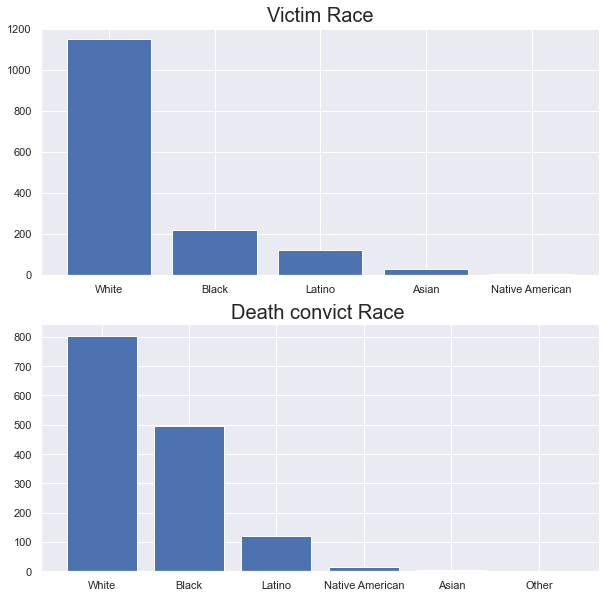

In [19]:
VictimRace=pd.Series(VictimRace)
VRc=VictimRace.value_counts()

fig_dims = (10, 10)  # 그래프의 출력 사이즈를 나타냄.
sns.set(rc={'figure.figsize':fig_dims}) # plot 사이즈 및 스타일 통일
plt.subplot(2,1,1)
plt.bar(VRc.index,VRc)
plt.title('Victim Race',size=20)

plt.subplot(2,1,2)
DRc=pd.Series(execution["Race"]).value_counts() #사형수 인종 count
plt.bar(DRc.index,DRc)
plt.title('Death convict Race ',size=20)

In [20]:
VRc['White']/VRc['Black']  #희생자 백인/흑인

5.213636363636364

In [21]:
DRc['White']/DRc['Black'] #사형수 백인/흑인

1.6222222222222222

### Q5. 
사형 집행에 대해 흑인과 백인의 인종 차별이 있었다고 생각하는가?
### A5. 
주어진 데이터만 보면 1~3명의 희생자를 낸 세 경우 모두 사형수의 인종은 백인이 더 많다.  
하지만 2000년 기준 미국 거주 흑인과 백인의 비율을 고려 했을 때, 세 경우 모두 사형집행을 피하는 것에 백인이 흑인보다 3배 이상 유리해보인다. 따라서 인종의 차이가 경제적 여유, 생활 환경, 폭력성 등을 포함한 다른 외적변수들을 결정하지 않는다는 가정 하에 사형집행에 대한 인종 차별이 있었다고 생각한다.

In [22]:
W1=len(execution.loc[(execution.Race=="White")& (execution.iloc[:,6]==1)]) #1명 살인한 백인 사형수의 수
B1=len(execution.loc[(execution.Race=="Black")& (execution.iloc[:,6]==1)]) #1명 살인한 흑인 사형수의 수
W2=len(execution.loc[(execution.Race=="White")& (execution.iloc[:,6]==2)]) #2명 살인한 백인 사형수의 수
B2=len(execution.loc[(execution.Race=="Black")& (execution.iloc[:,6]==2)]) #2명 살인한 흑인 사형수의 수
W3=len(execution.loc[(execution.Race=="White")& (execution.iloc[:,6]==3)]) #3명 살인한 백인 사형수의 수
B3=len(execution.loc[(execution.Race=="Black")& (execution.iloc[:,6]==3)]) #3명 살인한 흑인 사형수의 수
[W1, B1 , W2 , B2 , W3 , B3]

[578, 393, 138, 59, 50, 28]

In [23]:
# 2000년 기준 미국 총인구에 대한 백인 : 흑인 = 75 : 12.3 (6 : 1)
(W1/75)/(B1/12.3) 

0.24120101781170486

In [24]:
(W2/75)/(B2/12.3) #1보다 훨씬 작은 수이므로 총 인구 대비 흑인과 백인의 사형수의 수가 평등하지 않다.

0.3835932203389831

In [25]:
(W3/75)/(B3/12.3)

0.29285714285714287

### Q6. 
어떤 방법으로 사형이 집행되었는가?
### A6. 
독살형(치사 주사), 전기사형, 가스실형, 총살형, 교수형의 방법으로 사형이 집행되었고, 사형수들의 87%가 독살형으로 사망했다. 


In [26]:
execution['Method'].value_counts()/len(execution)

Lethal Injection    0.878641
Electrocution       0.109570
Gas Chamber         0.007628
Firing Squad        0.002080
Hanging             0.002080
Name: Method, dtype: float64

### Q7.
사형집행 당시 사형수의 나이는 어떠한가?
### A7.
사형된 사형수 중 가장 적은 나이는 22세, 가장 많은 나이는 77세였다. 평균적으로 41살에 사형되었다. 

In [27]:
[min(execution['Age']),max(execution['Age'])] #사형수 나이의 범위

[22, 77]

In [28]:
np.median(execution['Age']) #사형이 집행된 사형수의 나이 중앙값

40.0

In [29]:
m=np.mean(execution['Age'])
m#사형이 집행된 사형수의 평균 나이

41.479889042995836

In [30]:
s=np.std(execution['Age']) #사형이 집행된 사형수의 나이 표준편차
s

9.468390978774558

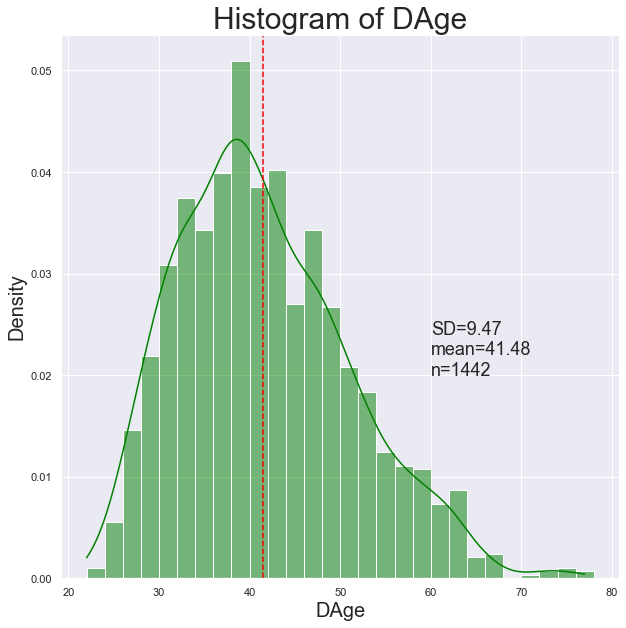

In [31]:
#히스토그램과 밀도곡선 겹쳐 그리기 
sns.histplot(x='Age',binwidth=2,data=execution,kde=True,stat='density',color="Green") #단봉 분포
plt.title('Histogram of DAge',size=30) 
plt.xlabel('DAge',size=20)
plt.ylabel('Density',size=20)

n=len(execution['Age'])
plt.text(60, 0.02,"n="+str(n), fontsize=18)
plt.text(60, 0.022,"mean="+str(round(m,2)), fontsize=18)
plt.text(60, 0.024,"SD="+str(round(s,2)), fontsize=18)

plt.axvline(m,0,1,color='red',linestyle='--') #평균 표시, 분포가 왼쪽으로 치우쳐져 있음.

In [32]:
n=len(execution['Age'])
n

1442

### Q8.
미국의 어느 지역 교도소에서 사형수가 가장 많이 관리했는가?
### A8.
사형수의 약 81%가 미국 남부 지역 관할이었다. 남부 지역 중에서 텍사스 주 - 오클라호마 주 - 버지니아 주 - 플로리다 주 순으로 관리 중인 사형수의 수가 많았다. 특히 텍사스 주의 교도소에서 37%로, 상당히 많은 사형수가 있었습니다. 

In [33]:
execution[['Region','State']].value_counts()

Region     State
South      TX       538
           OK       112
           VA       111
           FL        92
Midwest    MO        87
South      GA        69
           AL        58
Midwest    OH        53
South      NC        43
           SC        43
West       AZ        37
South      LA        28
           AR        27
           MS        21
Midwest    IN        20
South      DE        16
West       CA        13
           NV        12
Midwest    IL        12
West       UT         7
South      TN         6
           MD         5
West       WA         5
South      KY         3
           FE         3
Northeast  PA         3
Midwest    SD         3
West       ID         3
           MT         3
Midwest    NE         3
West       OR         2
Northeast  CT         1
West       CO         1
           NM         1
           WY         1
dtype: int64

In [34]:
#사형수의 관할 지역에 대한 분할표 만들기
RegionTB=pd.crosstab(execution['Region'], execution['State'],margins=True)

In [35]:
RegionTB.sum(axis=1)/RegionTB.sum(axis=1)['All'] #남부지역 81% , 중서부 지역 12%

Region
Midwest      0.123440
Northeast    0.002774
South        0.814840
West         0.058946
All          1.000000
dtype: float64

In [36]:
RegionTB.sum(axis=0)

State
AL      116
AR       54
AZ       74
CA       26
CO        2
CT        2
DE       32
FE        6
FL      184
GA      138
ID        6
IL       24
IN       40
KY        6
LA       56
MD       10
MO      174
MS       42
MT        6
NC       86
NE        6
NM        2
NV       24
OH      106
OK      224
OR        4
PA        6
SC       86
SD        6
TN       12
TX     1076
UT       14
VA      222
WA       10
WY        2
All    2884
dtype: int64

In [37]:
len(execution.loc[execution['State']=='TX'])/len(execution)  #전체 중 텍사스 주 사형수 관할 비율

0.37309292649098474

### Q9. 
사형 집행 날짜에 대한 분석
### A9.
1976년부터 2016년까지 41년동안 집행된 1442건의 사형 날짜를 분석해봤을 때, 1976, 1978, 1980년도는 사형이 집행되지 않았다. 
반면 1999년에 98번으로 가장 많은 사형이 집행되었다.  
년도를 고려하지 않았을 때는 41년간 총 149건으로 5월에  가장 많이, 총 96건으로 2월에 가장 적게 사형이 집행되었다. 
년도와 월을 모두 고려했을 때, 2000년 6월에 총 13건의 사형이 집행되었다.  
또한 1999~2000년도를 기점으로 사형의 수가 점점 줄어들고 있다.

In [38]:
#Date(사형집행날짜) 변수에 대한 데이터 전처리
#범주형 변수인 'Date'변수를 사형집형 년도(year), 사형집행 월(month)로 나눠 수치형 변수로 변환

split=execution['Date'].str.split("/") 
month=split.str.get(0)
year=split.str.get(2)
month=pd.to_numeric(month)
year=pd.to_numeric(year)

#사형집행 년도, 월 데이터프레임(Date) 만들기
Date=pd.DataFrame({'year' : year, 'month': month})
Date

,year,month
0,1977,1
1,1979,5
2,1979,10
3,1981,3
4,1982,8
...,...,...
1437,2016,10
1438,2016,10
1439,2016,11
1440,2016,12


In [39]:
year=list(Date['year']) #사형 집행 년도 변수를 리스트로 변환
check=range(1976,2017)  #사형 집행 가능 년도

#사형이 집행되지 않았던 년도
for i in check:
    if i not in year:
        print(i)

1976
1978
1980


In [40]:
Date['year'].value_counts() #1999년에 사형수들이 가장 많이 사형되었다.

1999    98
2000    85
1997    74
2002    71
1998    68
2001    66
2003    65
2005    60
2004    59
1995    56
2006    53
2009    52
2010    46
1996    45
2011    43
2012    43
2007    42
2013    39
1993    38
2008    37
2014    35
1992    31
1994    31
2015    28
1987    25
1990    23
1984    21
2016    20
1986    18
1985    18
1989    16
1991    14
1988    11
1983     5
1979     2
1982     2
1981     1
1977     1
Name: year, dtype: int64

In [41]:
Date['month'].value_counts() # 41년의 기간동안 5월에 가장 많은 사형이 집행되었다.

5     149
1     146
6     140
3     135
8     122
4     118
7     117
11    113
9     108
12    102
10     96
2      96
Name: month, dtype: int64

In [42]:
Date.value_counts() # 사형이 가장 많이 집행된 달은 2000년 6월이다.

year  month
2000  6        13
      1        12
1999  2        12
1997  5        11
2003  7        11
               ..
1990  8         1
2011  4         1
1990  10        1
      11        1
1977  1         1
Length: 366, dtype: int64

Text(0.5, 1.0, 'execution year')

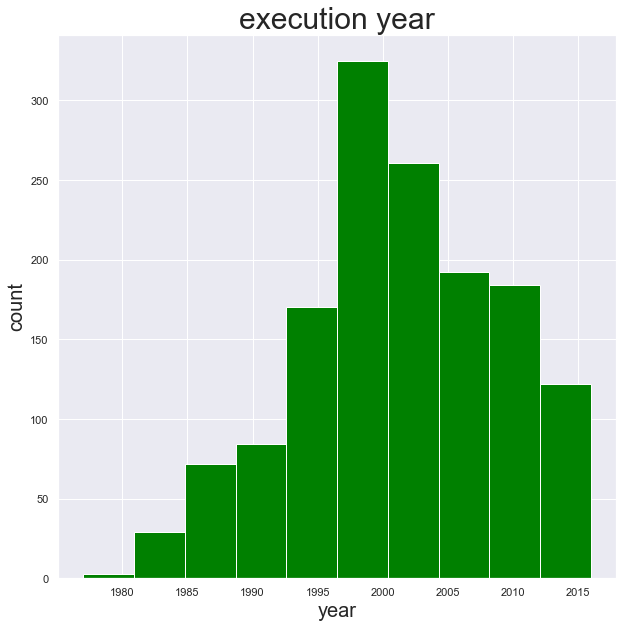

In [43]:
plt.hist(Date['year'],color="Green") 
plt.xlabel("year",size=20)
plt.ylabel("count",size=20)
plt.title("execution year",size=30) #1999~2000년도를 기점으로 사형의 수가 점점 줄어들고 있다.

### Q10.
사형수의 사형 집행 나이와 사형 집행 년도는 관계가 있는가?
### A10.
없다.  
즉, 특정 해에 특정 나이를 가진 사형수의 사형이 더 많이(적게) 집행되지 않았다.


In [44]:
execution['Age'].corr(Date['year']) #사형집행 당시 사형수의 나이와 사형집행 년도는 무관하다. 

0.2877182143546616

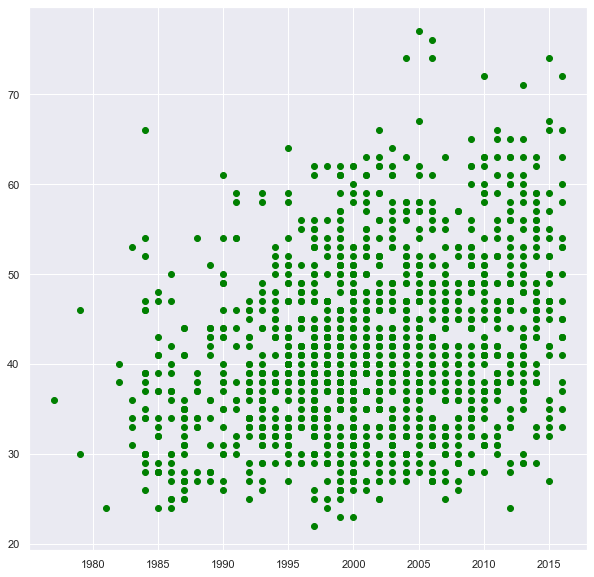

In [45]:
plt.plot(Date['year'],execution['Age'],marker='o',linestyle='none',color="green") #직선관계가 없다.

### Q11.
살해 당한 희생자의 수에 성별의 차이가 있는가?
### A11.
희생자의 성별 비는 남 : 여 = 51.2: 48.8 로 거의 차이가 없다.  
하지만 사형수의 성별은 98.9%가 남자로, 사형된 사람의 거의 대부분이 남자였다.


In [46]:
execution['Victim Sex'].head # Victim Sex(희생자 성별) 변수 데이터 전처리 필요

<bound method NDFrame.head of 0                   Male
1                   Male
2                   Male
3       2 Male, 2 Female
4                   Male
              ...       
1437    1 Male, 1 Female
1438                Male
1439              Female
1440                Male
1441                Male
Name: Victim Sex, Length: 1442, dtype: object>

In [47]:
# Victim Sex(희생자 성별) 변수 데이터 전처리
VS=execution['Victim Sex']
VS1=VS[execution['Victim Sex'].str.contains(',')==True]
split=VS1.str.split(",")
s1=split.str.get(0)
s2=split.str.get(1)
 
VS2=VS[execution['Victim Sex'].str.contains(',')!=True]
VS2=VS2.dropna(axis=0)
VS2=VS2.values.tolist()
l1=string_s(s1)    
l2=string_s(s2)      

VictimSex= VS2 + l1+ l2
VictimSex=pd.Series(VictimSex) 
VictimSex #희생자의 성별

0         Male
1         Male
2         Male
3         Male
4         Male
         ...  
1820    Female
1821    Female
1822    Female
1823    Female
1824    Female
Length: 1825, dtype: object

In [48]:
VSc=VictimSex.value_counts()
VSc #희생자 성별 요약

Male      935
Female    890
dtype: int64

In [49]:
DSc=execution.groupby('Sex').size()
DSc #사형수 성별 요약

Sex
Female      16
Male      1426
dtype: int64

Text(0.5, 1.0, 'Death Convict Sex')

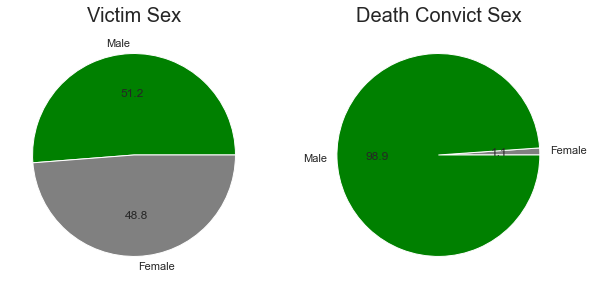

In [50]:
#희생자 성별 원형 그래프
plt.subplot(1,2,1)
plt.pie(VSc,labels=VSc.index ,autopct='%.1f',colors=['green','grey'])
plt.title("Victim Sex",size=20)
#사형수 성별 원형 그래프
plt.subplot(1,2,2)
plt.pie(DSc,labels=DSc.index ,autopct='%.1f',colors=['grey','green'])
plt.title("Death Convict Sex",size=20)

### ==============

### Q12. 2000년을 기준으로 한 사형 집행 횟수의 분포는 어떠한가?

### A12.

사형제도가 도입되고 사형 집행의 횟수는 증가하는 경향이 있었지만,  
21세기에 들어서면서 사형 집행의 횟수가 줄어들고 있는 경향이 있다.

In [51]:
f=Date.assign(group=(Date.year<2000)) #2000년을 기준으로 그룹 분할
f2=f.replace([True,False],['Y1','Y2']) # Y1 = 1977~1999, Y2 = 2000~2016
f2

,year,month,group
0,1977,1,Y1
1,1979,5,Y1
2,1979,10,Y1
3,1981,3,Y1
4,1982,8,Y1
...,...,...,...
1437,2016,10,Y2
1438,2016,10,Y2
1439,2016,11,Y2
1440,2016,12,Y2


In [52]:
x1=Date['year'][Date['year']<2000]
m1=round(np.mean(x1.value_counts()),2)
s1=round(np.std(x1.value_counts()),2)
n1=len(x1)

In [53]:
x2=Date['year'][Date['year']>=2000]
m2=round(np.mean(x2.value_counts()),2)
s2=round(np.std(x2.value_counts()),2)
n2=len(x2)

Text(0.8, 0.32, 's=16.12')

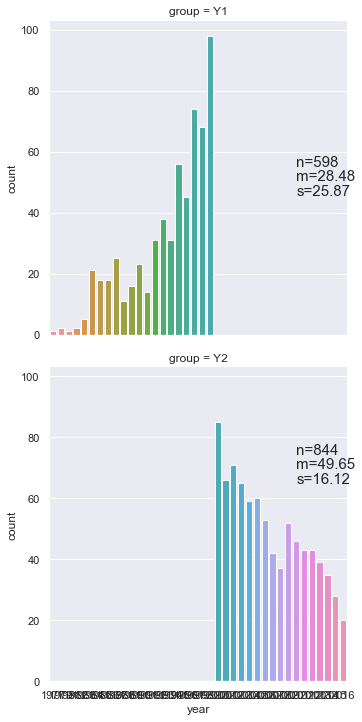

In [54]:
p=sns.catplot(x='year',row='group',kind='count',data=f2)

p.fig.text(0.80, 0.76,"n="+str(n1), fontsize=15)
p.fig.text(0.80, 0.74,"m="+str(m1), fontsize=15)
p.fig.text(0.80, 0.72,"s="+str(s1), fontsize=15)
p.fig.text(0.80, 0.36,"n="+str(n2), fontsize=15)
p.fig.text(0.80, 0.34,"m="+str(m2), fontsize=15)
p.fig.text(0.80, 0.32,"s="+str(s2), fontsize=15)

### Q13. 2000년 이후, 희생자 중 흑인의 비율이 높아졌는가?

### A13.

가설검정의 결과, 2000년 이전 희생자 중 흑인의 비율보다 2000년 이후 희생자 중 흑인의 비율이 높아졌다고 할 수 있다.

In [55]:
execution['Victim Count'][Date['year']<2000].sum() # 2000년 이전까지의 희생자 총 수 

833

In [56]:
VictimRace.loc[0:882].value_counts() # 2000년 이전까지 희생당한 인종의 수

White              714
Black              115
Latino              41
Asian               11
Native American      2
dtype: int64

In [57]:
round(115/len(VictimRace.loc[0:882]),2) # 2000년 이전까지 흑인의 희생률

0.13

가설 세우기

- H0 : p = 0.13
- H1 : p > 0.13

유의수준 정하기

a = 0.01

In [58]:
VictimRace.loc[883:].value_counts() # 2000년 이후 희생당한 인종의 수

White              433
Black              105
Latino              81
Asian               18
Native American      1
dtype: int64

In [59]:
execution['Victim Count'][Date['year']>=2000].sum() # 2000년 이후 희생자 총 수

1384

표본의 크기가 충분히 크므로 중심극한 정리를 적용하여 영분포를 구한다.

In [60]:
(0.13*(1-0.13)/638)**0.5 # 영분포 ~ N(0.13,(0.0133)^2)

0.013314380468978919

검정통계량 계산

In [61]:
round(105/638,3) #데이터로부터 얻은 표본비율(관측 통계량)은 0.165이다.

0.165

In [62]:
z=(0.165-0.13)/0.0133 #표준화된 검정통계량
z

2.6315789473684212

유의확률 계산

In [63]:
1-stats.norm(0,1).cdf(z)  # p-value

0.004249455934601132

유의성 판단

p-value = 0.0042 , a = 0.01  
유의확률 p-value가 유의수준 a 보다 작으므로 영가설을 기각한다. 

### Q14. 남부지역 중 사형수 관할 지역이 버지니아 주, 플로리다 주이냐에 따라 사형 방법이 달라졌는가?

### A14.

가설 검정의 결과, 버지니아 주와 플로리다 주에서 독살형 집행 비율이 달랐다고 할 수 있으므로  
두 주에 따라 사형 방법이 달라졌다고 할 수 있다.

In [64]:
VAFL=execution[(execution['State']=='FL') | (execution['State']=='VA')].loc[:,['State','Method']]

In [65]:
VAFL=VAFL.reset_index()  #인덱스 리셋
VAFL=VAFL.loc[:,['State','Method']]
VAFL

,State,Method
0,FL,Electrocution
1,VA,Electrocution
2,FL,Electrocution
3,FL,Electrocution
4,FL,Electrocution
...,...,...
198,FL,Lethal Injection
199,FL,Lethal Injection
200,VA,Lethal Injection
201,FL,Lethal Injection


In [66]:
VAFL.head(5)

,State,Method
0,FL,Electrocution
1,VA,Electrocution
2,FL,Electrocution
3,FL,Electrocution
4,FL,Electrocution


In [67]:
table = pd.crosstab(VAFL['State'],VAFL['Method'])
pd.crosstab(VAFL['State'],VAFL['Method'],margins=True)

Method,Electrocution,Lethal Injection,All
State,,,
FL,44,48,92
VA,31,80,111
All,75,128,203


In [68]:
prop = table.apply(lambda x : x/sum(x), axis = 1) # 주(플로리다, 버지니아)에 따른 독살형,전기충격형 방법의 비율
prop

Method,Electrocution,Lethal Injection
State,,
FL,0.478261,0.521739
VA,0.279279,0.720721


- 플로리다에서 독살형의 비율 52.17%  
- 버지니아에서 독살형의 비율 72.07%  

플로리다보다 버지니아에서 독살형을 더 많이 집행하고 있다.

In [69]:
prop.iloc[1,1] - prop.iloc[0,1] # 독살형의 차이

0.1989815902859381

In [70]:
prop.iloc[1,1] / prop.iloc[0,1] # 독살형의 비

1.3813813813813813

<AxesSubplot:xlabel='State', ylabel='Count'>

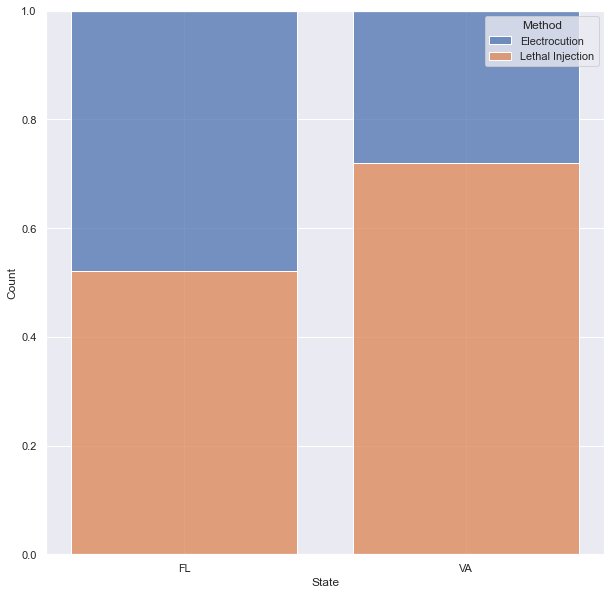

In [71]:
sns.histplot(x='State',multiple = 'fill',data=VAFL,hue='Method', shrink = 0.8)

- 영가설 : 버지나아 주의 독살형 비율은 플로리다 주의 독살형 비율과 같다.   
- 대안가설 : 버지나아 주의 독살형 비율은 플로리다 주의 독살형 비율과 같지 않다. 

H0 : P(VA)-P(FL) = 0  
H1 :  P(VA)-P(FL) ≠ 0  

- 유의수준 : a = 0.01

Statisics : 두 그룹의 독살형 표본 비율의 차 = 0.199

In [72]:
diff=prop.iloc[1,1] - prop.iloc[0,1]
diff

0.1989815902859381

In [73]:
import random 

In [74]:
# 반응변수인 Method의 값을 무작위로 섞어서 두 그룹에 배정하는 simulation을 5000번 반복한다.
# 위 과정으로 생성된 5000개의 표본에서 버지니아 주 독살형의 비율과 플로리다 주 독살형의 비율의 차를 계산
# 독살형 비율의 차이 5000개를 null_diff에 저장.


null_diff = []
VAFL_s = VAFL.copy()

random.seed(1112)

for i in range(5000) :
     random.shuffle(VAFL_s['Method'])
     prop_table = pd.crosstab(VAFL_s['State'],VAFL_s['Method'], normalize="index") # 행 기준 비율에 대한 2*2 분할표
     prop_d = prop_table.iloc[1,1] # 버지니아 주에서 독살형의 비율 
     prop_c = prop_table.iloc[0,1] # 플로리다 주에서 독살형의 비율 
     res = prop_d - prop_c # 비율의 차이
     null_diff.append(res)

In [75]:
# 유의 확률 : 버지니아와 플로리다 주에서 독살형 비율의 차이의 영가설 하의 분포에서 관측된 차이값보다 클 확률
p_value = sum(null_diff >= diff) / 5000
p_value

0.002

Text(0.5, 1.0, 'distribution of difference')

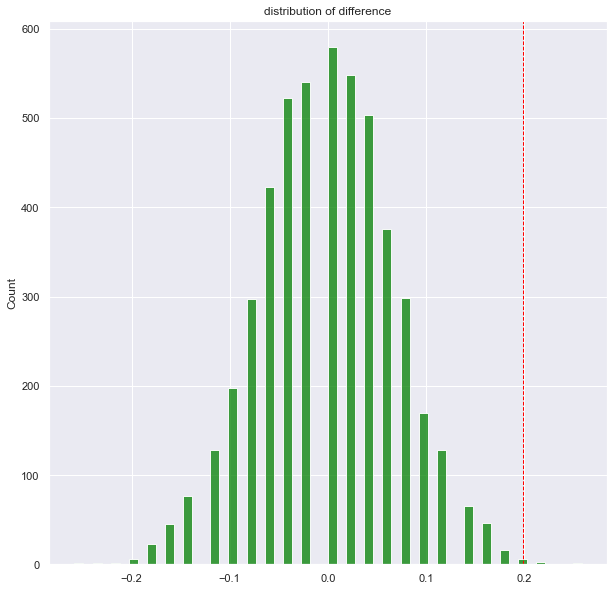

In [76]:
#영가설하의 독살형 비율의 차이 분포 시각화
sns.histplot(null_diff, color="green")
plt.axvline(diff, color='red', linestyle='dashed', linewidth=1) #p-value가 0에 가까움이 확인된다.
plt.title('distribution of difference')

결론

버지니아 주와 플로리다 주에서 독살형 집행 비율의 차이는 0.199로 버지니아 주의 비율이 더 컸다.  
이 차이의 유의성을 판단하기 위해 영분포 하에서 모의실험을 진행한 후, p-value를 구하였다.   
p-value는 0.002로 유의수준 0.01보다 작아 두 주 사이의 독살형 집행 비율의 차이는 통계적으로 유의하다.  

### Q15. 연간 희생자 수 평균에 대한 95% 신뢰구간 구해보기

### A15.

(43.288, 73.397)

In [77]:
execution['year']=Date['year']
d=execution.loc[:,['year','Victim Count']] #년도, 희생자 수 데이터
d

,year,Victim Count
0,1977,1
1,1979,1
2,1979,1
3,1981,4
4,1982,1
...,...,...
1437,2016,2
1438,2016,1
1439,2016,1
1440,2016,1


In [78]:
year=execution['year'].unique() #년도 값
year #1978, 1980년은 사형이 집행된 사형수에 의한 희생자 수 0명

array([1977, 1979, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016], dtype=int64)

In [79]:
year=execution['year'].unique() #년도 값
year
sample=[]
for y in year:
    a=d[d['year']== y].sum()
    sample.append(a[1])

In [80]:
sample # 연간 희생자 수 표본값

[1,
 2,
 4,
 2,
 6,
 25,
 30,
 21,
 34,
 19,
 16,
 42,
 18,
 43,
 56,
 47,
 71,
 71,
 98,
 97,
 130,
 117,
 256,
 95,
 98,
 75,
 95,
 83,
 67,
 52,
 75,
 62,
 64,
 67,
 62,
 47,
 43,
 26]

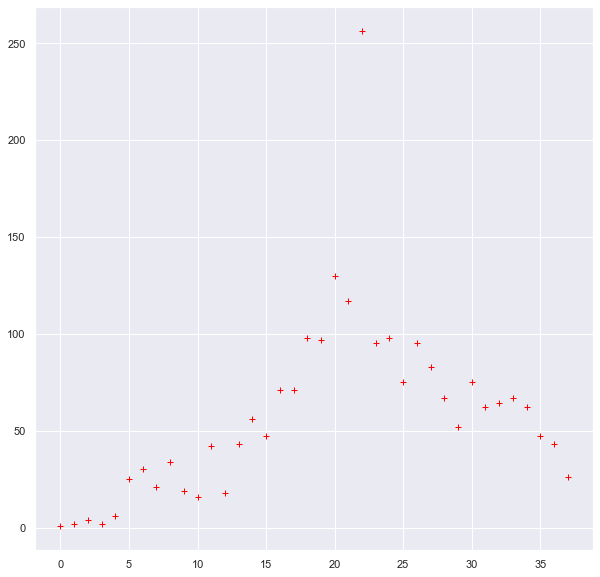

In [81]:
plt.plot(sample,'+',color="red") 

In [82]:
x_bar=sum(sample)/len(sample)
x_bar #표본평균

58.3421052631579

In [83]:
s=np.std(sample,ddof=1) #표본표준편차
s

47.34877852574988

In [84]:
q_975 = stats.norm.ppf(0.975, 0, 1)  # z_0.025
q_975

1.959963984540054

In [85]:
se = s/np.sqrt(len(sample))
[ x_bar - q_975 * se , x_bar + q_975 * se]

[43.287649060550976, 73.39656146576482]

## 참고

- 티머시 맥베이
https://ko.wikipedia.org/wiki/%ED%8B%B0%EB%A8%B8%EC%8B%9C_%EB%A7%A5%EB%B2%A0%EC%9D%B4
- 2000년도 미국 인구
https://ko.wikipedia.org/wiki/%EB%AF%B8%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC